In [221]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import mglearn
import plotly
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly.figure_factory as ff
import cufflinks as cf


import warnings
warnings.filterwarnings('ignore')

In [2]:
gps = pd.read_csv('googleplaystore.csv')
gps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [3]:
gps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
gps.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [5]:
gps[gps['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [6]:
gps.drop(10472,axis=0,inplace=True)

In [7]:
gps[gps['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


Task
1. drop NA columns
2. Change type of columns
3. 
4. Do exploratory analysis and draw insights
5. 
6. 
7. 
8. 
9. 
10. 



In [8]:
gps.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [9]:
gps[gps['App'] == 'Command & Conquer: Rivals']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [10]:
gps.drop(9148,axis=0,inplace=True)

In [11]:
gps.isnull().sum()

App                  0
Category             0
Rating            1473
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [23]:
print(gps.Category.unique())
gps.Category.nunique()

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


33

In [24]:
dum = gps[gps.Rating.isnull()].App
dum

23                    Mcqueen Coloring pages
113                Wrinkles and rejuvenation
123                   Manicure - nail design
126             Skin Care and Natural Beauty
129      Secrets of beauty, youth and health
                        ...                 
10824                              Cardio-FR
10825                     Naruto & Boruto FR
10831               payermonstationnement.fr
10835                               FR Forms
10838                 Parkinson Exercices FR
Name: App, Length: 1473, dtype: object

In [25]:
# Data cleaning for "Size" column
gps['Size'] = gps['Size'].map(lambda x: x.rstrip('M'))
gps['Size'] = gps['Size'].map(lambda x: str(round((float(x.rstrip('k'))/1024), 1)) if x[-1]=='k' else x)
gps['Size'] = gps['Size'].map(lambda x: np.nan if x.startswith('Varies') else x)

# Data cleaning for "Installs" column
gps['Installs'] = gps['Installs'].map(lambda x: x.rstrip('+'))
gps['Installs'] = gps['Installs'].map(lambda x: ''.join(x.split(',')))

# Data cleaning for "Price" column
gps['Price'] = gps['Price'].map(lambda x: x.lstrip('$').rstrip())

# Row [7312,8266] removed due to "Unrated" value in Content Rating
gps.drop(gps.index[[7312,8266]], inplace=True)

In [29]:
gps.isnull().sum()

App                  0
Category             0
Rating            1472
Reviews              0
Size              1694
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [33]:
# Label encoding
lb_make = LabelEncoder()

# Create column for "numeric" Content Rating 
gps["Content Rating NUM"] = lb_make.fit_transform(gps["Content Rating"])

# Form dicitonary for Content Rating and numeric values 
dict_content_rating = {"Adults only 18+": 0, "Everyone": 1, "Everyone 10+": 2, "Mature 17+": 3, "Teen": 4}

# Create column for "numeric" Category
gps["Category NUM"] = lb_make.fit_transform(gps["Category"])

# Form dicitonary for Category and numeric values
dict_category = {}
val = 0
for i in gps["Category"].unique():
 dict_category[i] = val
 val += 1

In [38]:
# Replace "NaN" with mean 
imputer = SimpleImputer()
gps['Rating'] = imputer.fit_transform(gps[['Rating']])
# Rounding the mean value to 1 decimal place
gps['Rating'].round(1)
gps.dropna(axis=0, inplace=True)

In [47]:
# Change datatype
gps['Reviews'] = pd.to_numeric(gps['Reviews'])
gps['Installs'] = pd.to_numeric(gps['Installs'])
gps['Price'] = pd.to_numeric(gps['Price'])
gps['Size'] =  pd.to_numeric(gps['Size'])

In [48]:
gps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9133 entries, 0 to 10840
Data columns (total 15 columns):
App                   9133 non-null object
Category              9133 non-null object
Rating                9133 non-null float64
Reviews               9133 non-null int64
Size                  9133 non-null float64
Installs              9133 non-null int64
Type                  9133 non-null object
Price                 9133 non-null float64
Content Rating        9133 non-null object
Genres                9133 non-null object
Last Updated          9133 non-null object
Current Ver           9133 non-null object
Android Ver           9133 non-null object
Content Rating NUM    9133 non-null int32
Category NUM          9133 non-null int32
dtypes: float64(3), int32(2), int64(2), object(8)
memory usage: 1.0+ MB


In [42]:

9133/10841 *100
# 84% of the original data is remaining after data cleaning 

84.24499584909141

In [52]:
#clean data
gps

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+'], dtype=object)

In [113]:
gps.groupby(gps['Category'])['App'].count().sort_values(ascending = False)

Category
FAMILY                 1828
GAME                   1015
TOOLS                   736
MEDICAL                 434
BUSINESS                400
PERSONALIZATION         353
LIFESTYLE               345
SPORTS                  311
FINANCE                 307
PRODUCTIVITY            303
COMMUNICATION           265
HEALTH_AND_FITNESS      264
PHOTOGRAPHY             254
NEWS_AND_MAGAZINES      216
DATING                  212
SOCIAL                  210
SHOPPING                201
BOOKS_AND_REFERENCE     196
TRAVEL_AND_LOCAL        192
VIDEO_PLAYERS           131
EDUCATION               111
MAPS_AND_NAVIGATION     108
FOOD_AND_DRINK          100
ENTERTAINMENT            90
LIBRARIES_AND_DEMO       81
AUTO_AND_VEHICLES        75
HOUSE_AND_HOME           68
ART_AND_DESIGN           61
EVENTS                   57
WEATHER                  57
PARENTING                54
COMICS                   51
BEAUTY                   47
Name: App, dtype: int64

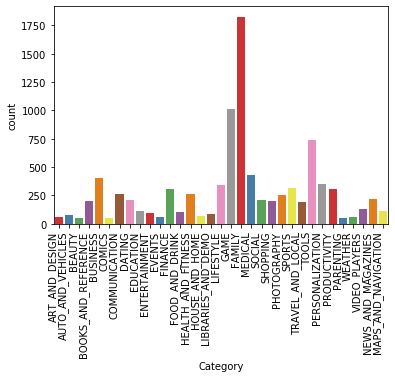

In [185]:
import matplotlib.pyplot
%matplotlib inline
count_plt = sns.countplot(x="Category",data=gps, palette = "Set1")
count_plt.set_xticklabels(count_plt.get_xticklabels(), rotation=90, ha="right")
count_plt 
#plt.title('Count of app in each category',size = 20)


### Top 10 of 33 Catogories with More number of applications in the playstore are Follows:
    Catagory                   Apps
    1.  FAMILY                 1828
    2.  GAME                   1015
    3.  TOOLS                   736
    4.  MEDICAL                 434
    5.  BUSINESS                400
    6.  PERSONALIZATION         353
    7.  LIFESTYLE               345
    8.  SPORTS                  311
    9.  FINANCE                 307
    10. PRODUCTIVITY            303

In [143]:
gps.groupby(gps['Category'])['Rating'].sum().sort_values(ascending = False)

Category
FAMILY                 7660.254650
GAME                   4330.362456
TOOLS                  2970.643791
MEDICAL                1816.794394
BUSINESS               1659.032152
PERSONALIZATION        1516.282541
LIFESTYLE              1418.664869
SPORTS                 1306.873102
FINANCE                1265.662456
PRODUCTIVITY           1258.840171
HEALTH_AND_FITNESS     1113.762456
COMMUNICATION          1092.055430
PHOTOGRAPHY            1054.151810
NEWS_AND_MAGAZINES      897.313059
SOCIAL                  891.828318
SHOPPING                849.018879
DATING                  848.178922
BOOKS_AND_REFERENCE     840.071895
TRAVEL_AND_LOCAL        781.036551
VIDEO_PLAYERS           529.876508
EDUCATION               486.791767
MAPS_AND_NAVIGATION     435.792974
FOOD_AND_DRINK          411.268275
ENTERTAINMENT           373.200000
LIBRARIES_AND_DEMO      340.335344
AUTO_AND_VEHICLES       311.601207
HOUSE_AND_HOME          283.401207
ART_AND_DESIGN          266.675302
EVENTS     

### Top 10 Catogories with Highest Rating
    1.  FAMILY          -       7660.254650
    2.  GAME            -       4330.362456
    3.  TOOLS           -       2970.643791
    4.  MEDICAL         -       1816.794394
    5.  BUSINESS        -       1659.032152
    6.  PERSONALIZATION -       1516.282541
    7.  LIFESTYLE       -       1418.664869
    8.  SPORTS          -       1306.873102
    9.  FINANCE         -       1265.662456
    10. PRODUCTIVITY    -       1258.840171

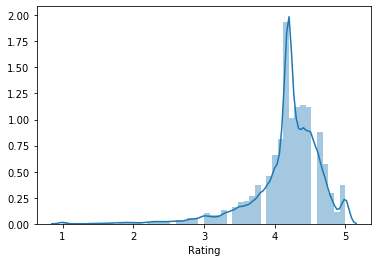

In [178]:
sns.distplot(gps.Rating)

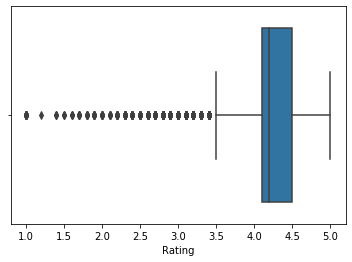

In [179]:
sns.boxplot(gps.Rating)

In [180]:
gps.Rating.skew()# it is highly left skewed

-1.9197882955527252

As a general rule of thumb: If skewness is 
1. less than -1 or greater than 1 - the distribution is highly skewed.
2. between [-1,-0.5] or between [0.5, 1] - the distribution is moderately skewed.
3. [-0.5,0.5] - the distribution is approximately symmetric.

In [144]:
gps.groupby(gps['Category'])['Installs'].sum().sort_values(ascending = False)

Category
GAME                   29874564253
FAMILY                  6798732825
COMMUNICATION           4941943051
NEWS_AND_MAGAZINES      4252005650
TOOLS                   3526544805
PRODUCTIVITY            2742312744
PHOTOGRAPHY             2557897655
SHOPPING                1504248785
SPORTS                  1138949498
PERSONALIZATION          998168772
ENTERTAINMENT            950960000
SOCIAL                   925264802
VIDEO_PLAYERS            891867720
HEALTH_AND_FITNESS       868411912
BUSINESS                 536078560
LIFESTYLE                437820839
TRAVEL_AND_LOCAL         356666146
FINANCE                  316923484
EDUCATION                278802000
FOOD_AND_DRINK           177688740
MAPS_AND_NAVIGATION      175029890
DATING                   141880807
BOOKS_AND_REFERENCE      139961076
WEATHER                  139300020
ART_AND_DESIGN            99333100
HOUSE_AND_HOME            75112461
LIBRARIES_AND_DEMO        60895910
MEDICAL                   46543877
AUTO_AND_VE

### Top 15 Apps with highest Installs
    Category                  Installs  
    GAME                   29874564253
    FAMILY                  6798732825
    COMMUNICATION           4941943051
    NEWS_AND_MAGAZINES      4252005650
    TOOLS                   3526544805
    PRODUCTIVITY            2742312744
    PHOTOGRAPHY             2557897655
    SHOPPING                1504248785
    SPORTS                  1138949498
    PERSONALIZATION          998168772
    ENTERTAINMENT            950960000
    SOCIAL                   925264802
    VIDEO_PLAYERS            891867720
    HEALTH_AND_FITNESS       868411912
    BUSINESS                 536078560

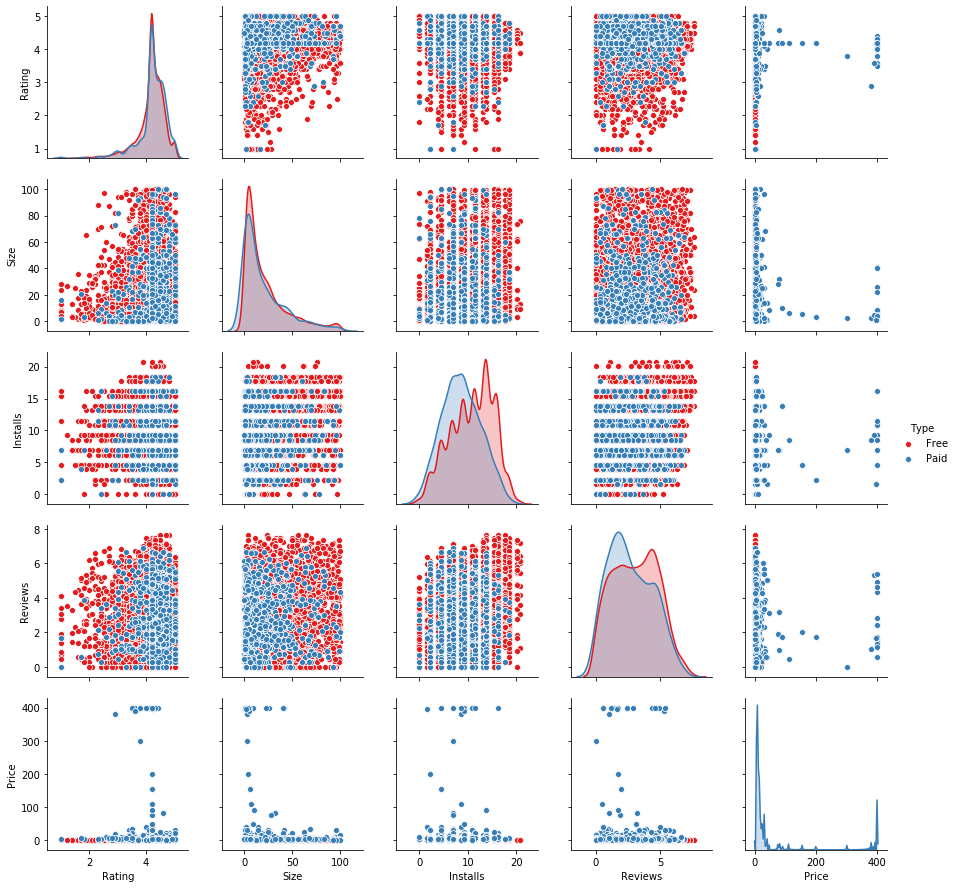

In [191]:
#overall Analysis
x = gps['Rating'].dropna()
y = gps['Size'].dropna()
z = gps['Installs'][gps.Installs!=0].dropna()
p = gps['Reviews'][gps.Reviews!=0].dropna()
t = gps['Type'].dropna()
price = gps['Price']

p = sns.pairplot(pd.DataFrame(list(zip(x, y, np.log(z), np.log10(p), t, price)), 
                        columns=['Rating','Size', 'Installs', 'Reviews', 'Type', 'Price']), hue='Type', palette="Set1")

###  Google Playstore Market Distribution

In [199]:
number_of_apps_in_category = gps['Category'].value_counts().sort_values(ascending=True)
number_of_apps_in_category
data = [go.Pie(
        labels = number_of_apps_in_category.index,
        values = number_of_apps_in_category.values,
        hoverinfo = 'label+value'
    
)]

plotly.offline.iplot(data, filename='active_category')

In [210]:
data = [go.Histogram(
        x = gps.Rating,
        xbins = {'start': 1, 'size': 0.1, 'end' :5}
)]

print('Average app rating = ', np.mean(gps['Rating']))
plotly.offline.iplot(data, filename='overall_rating_distribution')

Average app rating =  4.176698077862012


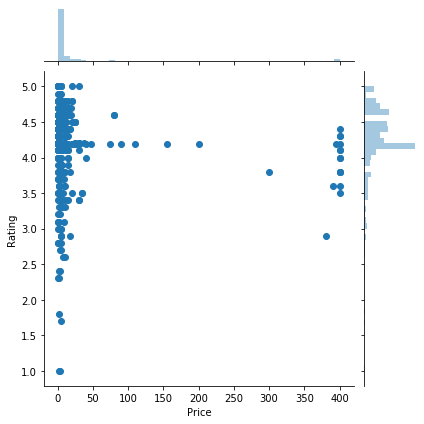

In [212]:
#visualising the impact of app prices on app rating
paid_apps = gps[gps.Price>0]
p = sns.jointplot( "Price", "Rating", paid_apps)

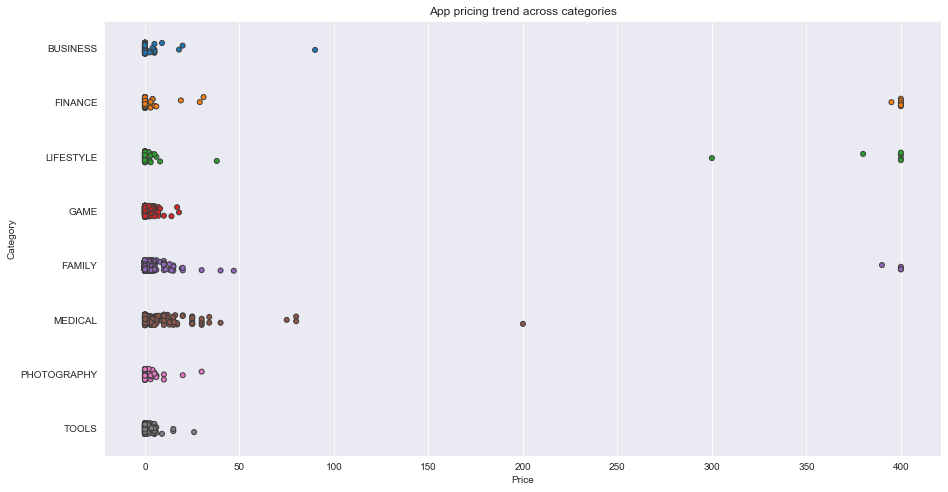

In [234]:
import matplotlib.pyplot as plt
subset_gps = gps[gps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY', 'MEDICAL', 'TOOLS', 'FINANCE',
                                 'LIFESTYLE','BUSINESS'])]
sns.set_style('darkgrid')
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
p = sns.stripplot(x="Price", y="Category", data=subset_gps, jitter=True, linewidth=1)
title = ax.set_title('App pricing trend across categories')


##
Finance, Lifestyle and Family has the highest prices. 
medical and business apps highest price apps are in the range $80-$100.
all gaming apps are below $25.





In [239]:
gps[['Category', 'App']][gps.Price > 200]

,Category,App
4197,FAMILY,most expensive app (H)
4362,LIFESTYLE,💎 I'm rich
4367,LIFESTYLE,I'm Rich - Trump Edition
5351,LIFESTYLE,I am rich
5354,FAMILY,I am Rich Plus
5355,LIFESTYLE,I am rich VIP
5356,FINANCE,I Am Rich Premium
5357,LIFESTYLE,I am extremely Rich
5358,FINANCE,I am Rich!
5359,FINANCE,I am rich(premium)


### Are paid apps downloaded as much as free apps?

In [236]:
trace0 = go.Box(
    y=np.log10(gps['Installs'][gps.Type=='Paid']),
    name = 'Paid',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )

)
trace1 = go.Box(
    y=np.log10(gps['Installs'][gps.Type=='Free']),
    name = 'Free',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
layout = go.Layout(
    title = "Number of downloads of paid apps Vs free apps",
    yaxis= {'title': 'Number of downloads (log-scaled)'}
)
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

### Distribution of paid and free apps across categories

ValueError: too many values to unpack (expected 2)

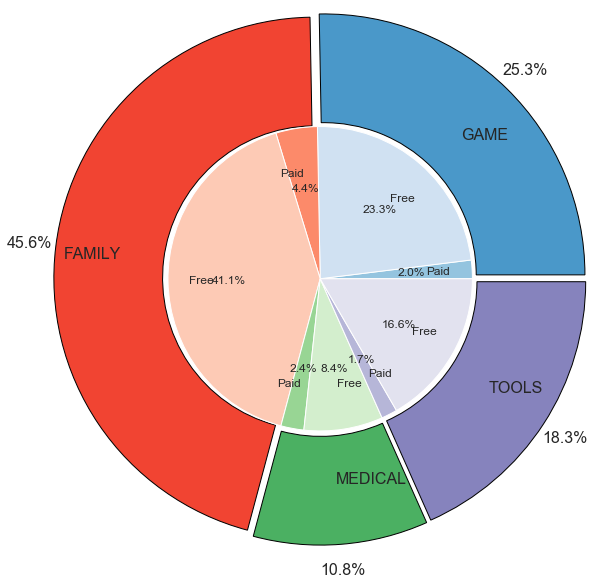

In [244]:
new_gps = gps.groupby(['Category', 'Type']).agg({'App' : 'count'}).reset_index()


outer_group_names = ['GAME', 'FAMILY', 'MEDICAL', 'TOOLS']
outer_group_values = [len(gps.App[gps.Category == category]) for category in outer_group_names]

a, b, c, d=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Purples]


inner_group_names = ['Paid', 'Free'] * 4
inner_group_values = []



for category in outer_group_names:
    for t in ['Paid', 'Free']:
        x = new_gps[new_gps.Category == category]
        try:
            
            inner_group_values.append(int(x.App[x.Type == t].values[0]))
        except:
            
            inner_group_values.append(0)

explode = (0.025,0.025,0.025,0.025)
# First Ring (outside)
fig, ax = plt.subplots(figsize=(10,10))
ax.axis('equal')
mypie, texts, _ = ax.pie(outer_group_values, radius=1.2, labels=outer_group_names, autopct='%1.1f%%', pctdistance=1.1,
                                 labeldistance= 0.75,  explode = explode, colors=[a(0.6), b(0.6), c(0.6), d(0.6)], textprops={'fontsize': 16})
plt.setp( mypie, width=0.5, edgecolor='black')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(inner_group_values, radius=1.2-0.5, labels=inner_group_names, labeldistance= 0.7,autopct='%1.1f%%', textprops={'fontsize': 12}, colors = [a(0.4), a(0.2), b(0.4), b(0.2), c(0.4), c(0.2), d(0.4), d(0.2)])
plt.setp( mypie2, width=0.5, edgecolor='black')
plt.margins(0,0)
 
# show it
plt.tight_layout()
plt.show()


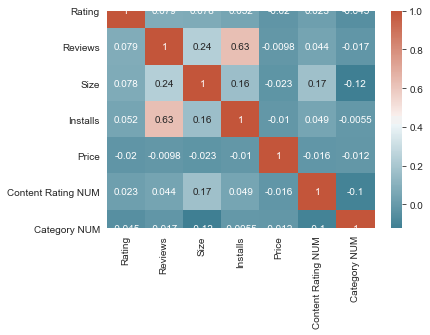

In [245]:
# evaluating correlation between the categories
corrmat = gps.corr()
p =sns.heatmap(corrmat, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [250]:
senti = pd.read_csv('googleplaystore_user_reviews.csv')
senti

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [254]:
senti.isnull().sum()
# more than 40% is missing from the data, so it is inaapropiate to perform analysis using these rows as the results eill be altered.     

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [255]:
senti_c = senti.dropna()
senti_c

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


In [324]:
merge = pd.merge(gps, senti_c, on = "App", how = "inner")

In [325]:
graph = merge.groupby('Category')['Sentiment'].value_counts()
graph

Category           Sentiment
ART_AND_DESIGN     Positive     233
                   Negative      58
                   Neutral       54
AUTO_AND_VEHICLES  Positive     133
                   Neutral       20
                               ... 
VIDEO_PLAYERS      Neutral       38
                   Negative      37
WEATHER            Positive      83
                   Neutral       17
                   Negative       9
Name: Sentiment, Length: 98, dtype: int64

In [326]:
graph = graph.to_frame(name=None)


In [327]:
graph = graph.rename(columns={'Sentiment': 'Count'})

In [328]:
graph = graph.reset_index().rename_axis(None, axis=1)

In [329]:
graph

,Category,Sentiment,Count
0,ART_AND_DESIGN,Positive,233
1,ART_AND_DESIGN,Negative,58
2,ART_AND_DESIGN,Neutral,54
3,AUTO_AND_VEHICLES,Positive,133
4,AUTO_AND_VEHICLES,Neutral,20
...,...,...,...
93,VIDEO_PLAYERS,Neutral,38
94,VIDEO_PLAYERS,Negative,37
95,WEATHER,Positive,83
96,WEATHER,Neutral,17


In [338]:
p = graph[graph.Sentiment=='Positive']
n = graph[graph.Sentiment=='Negative']
nu = graph[graph.Sentiment=='Neutral']
p

,Category,Sentiment,Count
0,ART_AND_DESIGN,Positive,233
3,AUTO_AND_VEHICLES,Positive,133
6,BEAUTY,Positive,162
9,BOOKS_AND_REFERENCE,Positive,232
12,BUSINESS,Positive,824
15,COMICS,Positive,6
17,COMMUNICATION,Positive,409
20,DATING,Positive,1780
23,EDUCATION,Positive,412
26,ENTERTAINMENT,Positive,699


ValueError: shape mismatch: objects cannot be broadcast to a single shape

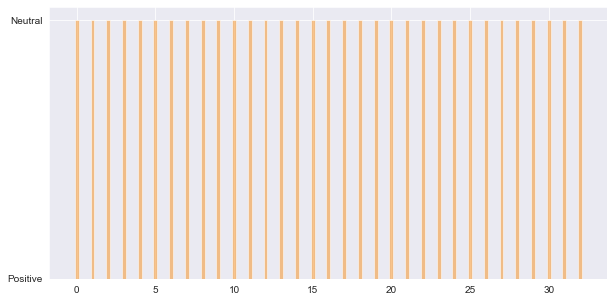

In [339]:
import matplotlib
import matplotlib.pyplot as plt

lables = merge.Category.unique()
pos = list(range(len(p['Sentiment']))) 
#x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, plt = plt.subplots(figsize=(10,5))
rects1 = plt.bar(pos,p['Sentiment'], width,alpha=0.5,color='#EE3224', label='Positive') 
rects2 = plt.bar(pos,nu['Sentiment'], width,alpha=0.5,color='#F78F1E', label='Neutral') 
rects3 = plt.bar(pos,n['Sentiment'], width,alpha=0.5,color='#FFC222', label='Negative')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count of Sentiment')
ax.set_title('Categories Groubed by Sentiment')
ax.set_xticks(pos)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
fig.tight_layout()

plt.show()